# Train and Test Neural Network 

Within this notebook we will train and test our 5 different neural networks. 

The goal is to train each neural network independently to prevent overfitting. Each neural network will be saved in a .h5 and .json file. This files will be later used for prediction by loading the trained models.

## 1. Import dependencies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from  pandas  import  DataFrame
from  pandas  import  concat
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout, Activation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.backend import tensorflow_backend as K
from keras import optimizers
from keras import callbacks
from keras.constraints import maxnorm

## 2. Load data

##### Load data for  1 ticker

In [3]:
df = pd.read_csv('Prepared data/Training_set_NN1.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,var2(t-150),var3(t-150),var2(t-149),var3(t-149),var2(t-148),var3(t-148),var2(t-147),var3(t-147),var2(t-146),var3(t-146),...,var2(t+88),var3(t+88),var2(t+89),var3(t+89),var2(t+90),var3(t+90),Y1,Y2,Y3,Date
0,0.310566,0.075460,0.239299,0.074575,0.423775,0.068674,0.609032,0.062815,0.444209,0.062630,...,0.268147,0.011611,0.298976,0.011636,0.299144,0.010164,0,0,1,2008-08-06
1,0.239299,0.074575,0.423775,0.068674,0.609032,0.062815,0.444209,0.062630,0.531393,0.060859,...,0.298976,0.011636,0.299144,0.010164,0.254234,0.009411,0,0,1,2008-08-07
2,0.423775,0.068674,0.609032,0.062815,0.444209,0.062630,0.531393,0.060859,0.431934,0.063652,...,0.299144,0.010164,0.254234,0.009411,0.314873,0.009418,0,0,1,2008-08-08
3,0.609032,0.062815,0.444209,0.062630,0.531393,0.060859,0.431934,0.063652,0.356585,0.060875,...,0.254234,0.009411,0.314873,0.009418,0.375092,0.006138,0,0,1,2008-08-11
4,0.444209,0.062630,0.531393,0.060859,0.431934,0.063652,0.356585,0.060875,0.316960,0.063061,...,0.314873,0.009418,0.375092,0.006138,0.243912,0.006186,0,0,1,2008-08-12


##### Separate into dependend and independant variables

In [4]:
X = df.drop(["Y1","Y2","Y3","Date"],axis=1).values
print(X.shape)

(2368, 482)


In [5]:
y = df.loc[:, df.columns.intersection(['Y1','Y2','Y3'])].values
print(y.shape)

(2368, 3)


##### Split data into train and test set

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1894, 482) (474, 482) (1894, 3) (474, 3)


## 3. Train and test neural network

In [13]:
model = Sequential()
model.add(Dense(500, input_dim=482, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(100, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(10, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(3, activation="relu", kernel_initializer="normal"))


model.compile(loss='mean_squared_error', optimizer="Adam", metrics=['accuracy'])
                
Neural_model = model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=2,
                         validation_data=(X_test, y_test))

Train on 1894 samples, validate on 474 samples
Epoch 1/200
 - 1s - loss: 0.2227 - acc: 0.7228 - val_loss: 0.1438 - val_acc: 0.7384
Epoch 2/200
 - 0s - loss: 0.1578 - acc: 0.7254 - val_loss: 0.1366 - val_acc: 0.7384
Epoch 3/200
 - 0s - loss: 0.1493 - acc: 0.7254 - val_loss: 0.1345 - val_acc: 0.7384
Epoch 4/200
 - 0s - loss: 0.1446 - acc: 0.7260 - val_loss: 0.1303 - val_acc: 0.7384
Epoch 5/200
 - 0s - loss: 0.1400 - acc: 0.7260 - val_loss: 0.1264 - val_acc: 0.7384
Epoch 6/200
 - 0s - loss: 0.1353 - acc: 0.7328 - val_loss: 0.1224 - val_acc: 0.7722
Epoch 7/200
 - 0s - loss: 0.1315 - acc: 0.7677 - val_loss: 0.1186 - val_acc: 0.7722
Epoch 8/200
 - 0s - loss: 0.1227 - acc: 0.7746 - val_loss: 0.1099 - val_acc: 0.7806
Epoch 9/200
 - 0s - loss: 0.1137 - acc: 0.8031 - val_loss: 0.1004 - val_acc: 0.8186
Epoch 10/200
 - 0s - loss: 0.1059 - acc: 0.8310 - val_loss: 0.0937 - val_acc: 0.8312
Epoch 11/200
 - 0s - loss: 0.0980 - acc: 0.8432 - val_loss: 0.0926 - val_acc: 0.8418
Epoch 12/200
 - 0s - loss: 

Epoch 97/200
 - 0s - loss: 0.0178 - acc: 0.9805 - val_loss: 0.0299 - val_acc: 0.9557
Epoch 98/200
 - 0s - loss: 0.0224 - acc: 0.9710 - val_loss: 0.0311 - val_acc: 0.9473
Epoch 99/200
 - 0s - loss: 0.0238 - acc: 0.9636 - val_loss: 0.0306 - val_acc: 0.9473
Epoch 100/200
 - 0s - loss: 0.0179 - acc: 0.9810 - val_loss: 0.0482 - val_acc: 0.9135
Epoch 101/200
 - 0s - loss: 0.0176 - acc: 0.9799 - val_loss: 0.0322 - val_acc: 0.9430
Epoch 102/200
 - 0s - loss: 0.0186 - acc: 0.9794 - val_loss: 0.0307 - val_acc: 0.9430
Epoch 103/200
 - 0s - loss: 0.0159 - acc: 0.9831 - val_loss: 0.0265 - val_acc: 0.9578
Epoch 104/200
 - 0s - loss: 0.0188 - acc: 0.9773 - val_loss: 0.0317 - val_acc: 0.9388
Epoch 105/200
 - 0s - loss: 0.0179 - acc: 0.9810 - val_loss: 0.0277 - val_acc: 0.9536
Epoch 106/200
 - 0s - loss: 0.0363 - acc: 0.9493 - val_loss: 0.0533 - val_acc: 0.9114
Epoch 107/200
 - 0s - loss: 0.0375 - acc: 0.9456 - val_loss: 0.0357 - val_acc: 0.9388
Epoch 108/200
 - 0s - loss: 0.0195 - acc: 0.9810 - val_lo

Epoch 193/200
 - 0s - loss: 0.0124 - acc: 0.9863 - val_loss: 0.0248 - val_acc: 0.9578
Epoch 194/200
 - 0s - loss: 0.0107 - acc: 0.9894 - val_loss: 0.0280 - val_acc: 0.9536
Epoch 195/200
 - 0s - loss: 0.0122 - acc: 0.9863 - val_loss: 0.0307 - val_acc: 0.9451
Epoch 196/200
 - 0s - loss: 0.0144 - acc: 0.9799 - val_loss: 0.0285 - val_acc: 0.9494
Epoch 197/200
 - 0s - loss: 0.0129 - acc: 0.9852 - val_loss: 0.0263 - val_acc: 0.9578
Epoch 198/200
 - 0s - loss: 0.0129 - acc: 0.9852 - val_loss: 0.0329 - val_acc: 0.9409
Epoch 199/200
 - 0s - loss: 0.0111 - acc: 0.9884 - val_loss: 0.0243 - val_acc: 0.9599
Epoch 200/200
 - 0s - loss: 0.0096 - acc: 0.9926 - val_loss: 0.0257 - val_acc: 0.9578


### 3.1 Plot results

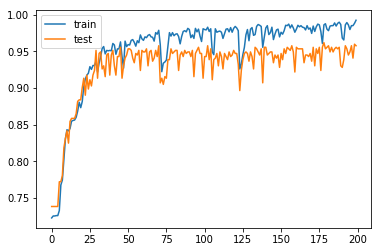

In [14]:
plt.plot(Neural_model.history['acc'], label='train')
plt.plot(Neural_model.history['val_acc'], label='test')
plt.legend()
plt.show()

<h3>Prevent overfitting:</h3>
    
As you can see in the chart above the training accuracy increases slightly after epoch 50 but our test accuracy remains roughly at the same level. Based on this it is recognizable that our model starts to overfit after epoch 50. To receive a good neural network which will generalize good we have to stop our neural network during training before it starts overfitting. 
The difficult part is that each neural network will have different training results. This will make it impossible to define a fix number of epochs. 

To stop each neural network during training before it starts overfitting we will use the callback method "EarlyStopping" from Tensorflow which will monitor the loss of our test set. If this value will not improve over a few epochs the callback will stop our neural network from training. 

### 3.2 Train and test neural network with EarlyStopping

In [15]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=4)

model = Sequential()
model.add(Dense(500, input_dim=482, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(100, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(10, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(3, activation="relu", kernel_initializer="normal"))


model.compile(loss='mean_squared_error', optimizer="Adam", metrics=['accuracy'])
                
Neural_model = model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=2,
                         validation_data=(X_test, y_test), callbacks = [earlystopping])

Train on 1894 samples, validate on 474 samples
Epoch 1/200
 - 1s - loss: 0.2289 - acc: 0.7043 - val_loss: 0.1414 - val_acc: 0.7384
Epoch 2/200
 - 0s - loss: 0.1546 - acc: 0.7260 - val_loss: 0.1354 - val_acc: 0.7384
Epoch 3/200
 - 0s - loss: 0.1449 - acc: 0.7260 - val_loss: 0.1306 - val_acc: 0.7384
Epoch 4/200
 - 0s - loss: 0.1409 - acc: 0.7429 - val_loss: 0.1269 - val_acc: 0.7384
Epoch 5/200
 - 0s - loss: 0.1364 - acc: 0.7571 - val_loss: 0.1215 - val_acc: 0.7743
Epoch 6/200
 - 0s - loss: 0.1290 - acc: 0.7687 - val_loss: 0.1129 - val_acc: 0.7869
Epoch 7/200
 - 0s - loss: 0.1209 - acc: 0.7825 - val_loss: 0.1043 - val_acc: 0.7932
Epoch 8/200
 - 0s - loss: 0.1104 - acc: 0.8110 - val_loss: 0.0973 - val_acc: 0.8333
Epoch 9/200
 - 0s - loss: 0.1058 - acc: 0.8152 - val_loss: 0.0990 - val_acc: 0.8333
Epoch 10/200
 - 0s - loss: 0.0992 - acc: 0.8321 - val_loss: 0.0925 - val_acc: 0.8333
Epoch 11/200
 - 0s - loss: 0.0935 - acc: 0.8395 - val_loss: 0.0842 - val_acc: 0.8523
Epoch 12/200
 - 0s - loss: 

As you can see in the output field above our callback stopped our neural network after the 46 epoch before our model starts overfitting.

### 3.3 Evaluate model

In [16]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: ' + str(trainScore))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: ' + str(testScore))

Train Score: [0.019521349851718644, 0.9751847940865892]
Test Score: [0.032130136174240195, 0.9514767917399668]


As you can see we archieved really good training and test results. A test accuracy of around 95% is a pretty good result. To use this trained network for predictions later on, we will now save the model and the weights of the model.

### 3.4 Save settings

In [17]:
for i in range(0,1):
    # Serialize the model to json
    model_json = model.to_json()
    json_file = open("2.2.2.1 Settings neural networks/model" + str(i) + ".json", 'w')
    json_file.write(model_json)
    json_file.close()
    print("model " + str(i) + " was saved successfully")
    
    # Serialize the weights to HDF5
    model.save_weights("2.2.2.1 Settings neural networks/model" + str(i) + ".h5")
    print("structure " + str(i) + " was saved successfully")


model 0 was saved successfully
structure 0 was saved successfully


Now that we trained and tested our neural network for the first ticker by preventing our network to overfit using EarlyStopping as Callback we achieved pretty good results. 

In the next step we will reply the above steps to build our 5 independent neural networks.

## 4. Run procedure 3 for all 5 tickers

In [21]:
for i in range(1,6):

    print("------------Running model " + str(i) + " /5 ----------------")
    
    # 1. Load the data 
    df = pd.read_csv('Prepared data/Training_set_NN' + str(i) + '.csv')
    df = df.drop('Unnamed: 0',axis=1)
    
    # 2. Separate the data into X and y
    X = df.drop(["Y1","Y2","Y3","Date"],axis=1).values  
    y = df.loc[:, df.columns.intersection(['Y1','Y2','Y3'])].values

    # 3. Split the data into training and testing set
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
    print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
    
    # 3.1 Safetycheck if dataframe is empty
    if len(X_train) == 0 or len(y_train) == 0 or len(X_test) == 0 or len(y_test) == 0:
        continue
    else:
        pass
    
    # 4. Test and train neural network using earlystopping
    earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=4)

    model = Sequential()
    model.add(Dense(500, input_dim=482, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.1))
    model.add(Dense(100, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.1))
    model.add(Dense(50, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.1))
    model.add(Dense(10, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.1))
    model.add(Dense(3, activation="relu", kernel_initializer="normal"))


    model.compile(loss='mean_squared_error', optimizer="Adam", metrics=['accuracy'])
                
    Neural_model = model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=2,
                         validation_data=(X_test, y_test), callbacks = [earlystopping])
    
    
    # 5. print evaluation metrics
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: ' + str(trainScore))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: ' + str(testScore))
    
    
    # 6. Save model weights
    # Serialize the model to json
    model_json = model.to_json()
    json_file = open("2.2.2.1 Settings neural networks/model" + str(i) + ".json", 'w')
    json_file.write(model_json)
    json_file.close()
    print("model " + str(i) + " was saved successfully")
    
    # Serialize the weights to HDF5
    model.save_weights("2.2.2.1 Settings neural networks/model" + str(i) + ".h5")
    print("structure " + str(i) + " was saved successfully")
    
    print("------------Finished model " + str(i) + " /5 ----------------\n")
print(str(i) + " Neural Models were trained")    

------------Running model 1 /5 ----------------
(2131, 482) (237, 482) (2131, 3) (237, 3)
Train on 2131 samples, validate on 237 samples
Epoch 1/200
 - 1s - loss: 0.2269 - acc: 0.5148 - val_loss: 0.1608 - val_acc: 0.6878
Epoch 2/200
 - 0s - loss: 0.1534 - acc: 0.7316 - val_loss: 0.1557 - val_acc: 0.6878
Epoch 3/200
 - 0s - loss: 0.1499 - acc: 0.7316 - val_loss: 0.1465 - val_acc: 0.6878
Epoch 4/200
 - 0s - loss: 0.1403 - acc: 0.7306 - val_loss: 0.1355 - val_acc: 0.6878
Epoch 5/200
 - 0s - loss: 0.1339 - acc: 0.7560 - val_loss: 0.1269 - val_acc: 0.7553
Epoch 6/200
 - 0s - loss: 0.1262 - acc: 0.7668 - val_loss: 0.1183 - val_acc: 0.7595
Epoch 7/200
 - 0s - loss: 0.1188 - acc: 0.7893 - val_loss: 0.1031 - val_acc: 0.8059
Epoch 8/200
 - 0s - loss: 0.1124 - acc: 0.8001 - val_loss: 0.1085 - val_acc: 0.7932
Epoch 9/200
 - 0s - loss: 0.1084 - acc: 0.8160 - val_loss: 0.0941 - val_acc: 0.8270
Epoch 10/200
 - 0s - loss: 0.1006 - acc: 0.8198 - val_loss: 0.0930 - val_acc: 0.8101
Epoch 11/200
 - 0s - l

Epoch 15/200
 - 0s - loss: 0.0786 - acc: 0.8531 - val_loss: 0.0924 - val_acc: 0.8228
Epoch 16/200
 - 0s - loss: 0.0771 - acc: 0.8531 - val_loss: 0.0909 - val_acc: 0.8228
Epoch 17/200
 - 0s - loss: 0.0764 - acc: 0.8536 - val_loss: 0.0891 - val_acc: 0.8228
Epoch 18/200
 - 0s - loss: 0.0740 - acc: 0.8564 - val_loss: 0.0880 - val_acc: 0.8228
Epoch 19/200
 - 0s - loss: 0.0718 - acc: 0.8559 - val_loss: 0.0866 - val_acc: 0.8312
Epoch 20/200
 - 0s - loss: 0.0707 - acc: 0.8611 - val_loss: 0.0870 - val_acc: 0.8312
Epoch 21/200
 - 0s - loss: 0.0709 - acc: 0.8611 - val_loss: 0.0834 - val_acc: 0.8439
Epoch 22/200
 - 0s - loss: 0.0668 - acc: 0.8846 - val_loss: 0.0797 - val_acc: 0.8354
Epoch 23/200
 - 0s - loss: 0.0688 - acc: 0.8864 - val_loss: 0.0791 - val_acc: 0.8565
Epoch 24/200
 - 0s - loss: 0.0638 - acc: 0.9000 - val_loss: 0.0781 - val_acc: 0.8439
Epoch 25/200
 - 0s - loss: 0.0637 - acc: 0.9038 - val_loss: 0.0732 - val_acc: 0.8523
Epoch 26/200
 - 0s - loss: 0.0617 - acc: 0.9057 - val_loss: 0.084

Epoch 9/200
 - 0s - loss: 0.1344 - acc: 0.7581 - val_loss: 0.1064 - val_acc: 0.8031
Epoch 10/200
 - 0s - loss: 0.1340 - acc: 0.7581 - val_loss: 0.1042 - val_acc: 0.8031
Epoch 11/200
 - 0s - loss: 0.1314 - acc: 0.7581 - val_loss: 0.1053 - val_acc: 0.8031
Epoch 12/200
 - 0s - loss: 0.1320 - acc: 0.7581 - val_loss: 0.1085 - val_acc: 0.8031
Epoch 13/200
 - 0s - loss: 0.1303 - acc: 0.7581 - val_loss: 0.1026 - val_acc: 0.8031
Epoch 14/200
 - 0s - loss: 0.1264 - acc: 0.7581 - val_loss: 0.0984 - val_acc: 0.8031
Epoch 15/200
 - 0s - loss: 0.1274 - acc: 0.7581 - val_loss: 0.0964 - val_acc: 0.8031
Epoch 16/200
 - 0s - loss: 0.1212 - acc: 0.7581 - val_loss: 0.0945 - val_acc: 0.8031
Epoch 17/200
 - 0s - loss: 0.1185 - acc: 0.7581 - val_loss: 0.0957 - val_acc: 0.8031
Epoch 18/200
 - 0s - loss: 0.1170 - acc: 0.7581 - val_loss: 0.0959 - val_acc: 0.8031
Epoch 19/200
 - 0s - loss: 0.1161 - acc: 0.7581 - val_loss: 0.0929 - val_acc: 0.8031
Epoch 20/200
 - 0s - loss: 0.1139 - acc: 0.7581 - val_loss: 0.0940

As you can see in the output field above each model have run through a different number of epochs before the training was stopped. You can also see, that all models have a test accuracy higher 87%. The accuracy varies between 87,7% and  96,6%.

After all 5 neural networks are trained and saved accordingly, we can now proceed to the prediction part of our project.

